In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
orders = pd.read_csv('data/orders.csv')
clients = pd.read_csv('data/clients.csv')
employees = pd.read_csv('data/employees.csv')
products = pd.read_csv('data/products.csv')
ratings = pd.read_csv('data/ratings.csv')
returns = pd.read_csv('data/returns.csv')
shipping = pd.read_csv('data/shipping.csv')
support = pd.read_csv('data/support.csv')

quantity purchased

dataframe.groupby()['column'].count() counts the specific column

In [4]:
quantity_purchased = orders.groupby(['order_id', 'product_id'], as_index = False)['order_date'].count().rename(columns = {"order_date":"quantity_purchased"})
quantity_purchased.head()

,order_id,product_id,quantity_purchased
0,O-000AF1130,70,1
1,O-000AF1130,84,1
2,O-000AF1130,105,1
3,O-000AF1130,109,1
4,O-000BX2004,7,1


quantity returned

In [7]:
quantity_returned = returns.groupby(['order_id', 'product_id'], as_index = False)['return_date'].count().rename(columns = {'return_date': 'quantity_returned'})
quantity_returned.head()

,order_id,product_id,quantity_returned
0,O-000Bw2933,70,1
1,O-000Df5137,97,1
2,O-000HU674,51,1
3,O-000Hp7898,85,1
4,O-000Il9723,66,1


In [9]:
quantity_purchased = pd.merge(quantity_purchased, quantity_returned, on = ['order_id', 'product_id'], how = 'left')
quantity_purchased.head()

,order_id,product_id,quantity_purchased,quantity_returned
0,O-000AF1130,70,1,NaN
1,O-000AF1130,84,1,NaN
2,O-000AF1130,105,1,NaN
3,O-000AF1130,109,1,NaN
4,O-000BX2004,7,1,NaN


In [10]:
quantity_purchased[quantity_purchased['quantity_returned'].notna()].shape

(39125, 4)

In [12]:
orders = pd.merge(orders, quantity_purchased, on = ['order_id', 'product_id'], how = 'left')

In [13]:
orders = orders.drop_duplicates()
orders[orders['quantity_returned'].notna()].shape

(39125, 6)

In [14]:
orders.head()

,order_date,order_id,client_id,product_id,quantity_purchased,quantity_returned
0,2020-01-01,O-140Bc1177,M8-5788593i,36,1,NaN
1,2020-01-01,O-412ZT8588,b4-7966766T,36,1,NaN
2,2020-01-01,O-855QP4607,S9-3623700t,98,2,NaN
4,2020-01-01,O-135YG6799,L9-0962901O,53,2,NaN
5,2020-01-01,O-135YG6799,L9-0962901O,77,1,NaN


In [15]:
products[products.end_date.isna()].shape

(98, 12)

In [16]:
from datetime import datetime
today = datetime.today().date()
products['start_date'] = pd.to_datetime(products['start_date'])
products['end_date'].fillna(today, inplace= True)
products['end_date'] = pd.to_datetime(products['end_date'])
products

/tmp/ipykernel_24229/3035689330.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['end_date'].fillna(today, inplace= True)


,category_1,category_2,category_3,category_4,category_5,name,description,base_price,start_date,end_date,sale_price,id
0,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.00,2020-01-07,2020-01-22,280.15,0
1,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.00,2020-01-23,2020-02-11,282.17,0
2,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.00,2020-02-12,2020-03-05,280.51,0
3,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.00,2020-03-06,2020-03-27,279.68,0
4,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.00,2020-03-28,2020-04-14,281.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8567,Beauté + santé,Santé,Massages,Pistolet de massage,NaN,Beurer MG 99,Ce pistolet de massage stylé permet de relâche...,69.21,2024-03-06,2024-03-28,75.36,109
8568,Beauté + santé,Santé,Massages,Pistolet de massage,NaN,Beurer MG 99,Ce pistolet de massage stylé permet de relâche...,69.21,2024-03-29,2024-04-22,75.12,109
8569,Beauté + santé,Santé,Massages,Pistolet de massage,NaN,Beurer MG 99,Ce pistolet de massage stylé permet de relâche...,69.21,2024-04-23,2024-05-19,75.83,109
8570,Beauté + santé,Santé,Massages,Pistolet de massage,NaN,Beurer MG 99,Ce pistolet de massage stylé permet de relâche...,69.21,2024-05-20,2024-06-11,75.78,109


In [19]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
products.rename({'id':'product_id'}, axis = 1, inplace = True)

products = pd.merge(products, orders, on = 'product_id', how = 'left')
products = products[(products.order_date <= products.end_date) & (products.order_date >= products.start_date)]
products.shape, products.product_id.nunique()

((274085, 17), 110)

sales, margin, revenue

In [20]:
products['sales'] = products['sale_price'] * products['quantity_purchased']

In [21]:
products.head()

,category_1,category_2,category_3,category_4,category_5,name,description,base_price,start_date,end_date,sale_price,product_id,order_date,order_id,client_id,quantity_purchased,quantity_returned,sales
0,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-07,O-947zk7117,s6-2652879Z,1,NaN,280.15
1,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-07,O-912CK1366,M8-5788593i,1,NaN,280.15
2,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-07,O-232NN3278,M6-4063913C,1,1.0,280.15
3,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-07,O-571BY4103,M0-880988E,1,NaN,280.15
4,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-08,O-275nW5932,S5-0768300P,1,NaN,280.15


In [22]:
products['margin'] = (products['sale_price'] - products['base_price']) * products['quantity_purchased']
products.head()

,category_1,category_2,category_3,category_4,category_5,name,description,base_price,start_date,end_date,sale_price,product_id,order_date,order_id,client_id,quantity_purchased,quantity_returned,sales,margin
0,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-07,O-947zk7117,s6-2652879Z,1,NaN,280.15,19.15
1,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-07,O-912CK1366,M8-5788593i,1,NaN,280.15,19.15
2,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-07,O-232NN3278,M6-4063913C,1,1.0,280.15,19.15
3,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-07,O-571BY4103,M0-880988E,1,NaN,280.15,19.15
4,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,280.15,0,2020-01-08,O-275nW5932,S5-0768300P,1,NaN,280.15,19.15


In [23]:
products['quantity_returned'].fillna(0, inplace = True)
products['revenue'] = products['sale_price'] * (products['quantity_purchased'] - products['quantity_returned'])
products.shape

/tmp/ipykernel_24229/4257643124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['quantity_returned'].fillna(0, inplace = True)


(274085, 20)

In [25]:
products.sales.sum()/products.shape[0]

214.4185553021873

In [26]:
products['net_profit'] = (products['sale_price'] - products['base_price']) * (products['quantity_purchased'] - products['quantity_returned'])
products.head()

,category_1,category_2,category_3,category_4,category_5,name,description,base_price,start_date,end_date,...,product_id,order_date,order_id,client_id,quantity_purchased,quantity_returned,sales,margin,revenue,net_profit
0,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,...,0,2020-01-07,O-947zk7117,s6-2652879Z,1,0.0,280.15,19.15,280.15,19.15
1,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,...,0,2020-01-07,O-912CK1366,M8-5788593i,1,0.0,280.15,19.15,280.15,19.15
2,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,...,0,2020-01-07,O-232NN3278,M6-4063913C,1,1.0,280.15,19.15,0.00,0.00
3,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,...,0,2020-01-07,O-571BY4103,M0-880988E,1,0.0,280.15,19.15,280.15,19.15
4,IT + multimédias,Audio,Casque + écouteur,Casque Gaming,NaN,SteelSeries Arctis Nova Pro Wireless,Le SteelSeries Arctis Nova Pro Gaming Headset ...,261.0,2020-01-07,2020-01-22,...,0,2020-01-08,O-275nW5932,S5-0768300P,1,0.0,280.15,19.15,280.15,19.15


In [27]:
products['profit_ratio'] = products['net_profit']/products['revenue']
products['profit_ratio'].fillna(0, inplace= True)

/tmp/ipykernel_24229/1055733875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['profit_ratio'].fillna(0, inplace= True)


In [28]:
products.revenue.sum()

50815787.68

# point 1

In [32]:
product_revenue = products.groupby(['product_id', 'name'], as_index= False)['revenue'].sum()
product_revenue = product_revenue.sort_values('revenue')

In [34]:
print('worst 3 products')
display(product_revenue.head(3))

worst 3 products


,product_id,name,revenue
102,102,PowerFood One Shot de pré-entraînement (60ml)\...,11053.03
101,101,Energy OatSnack (65g),12666.34
46,46,"Sac à compost, 9 l",19357.39


In [35]:
print('top 3 producst')
display(product_revenue.tail(3))

top 3 producst


,product_id,name,revenue
18,18,"Apple iPhone 14 Pro, 1000 Go, Silver, 6.10"", S...",1319128.96
19,19,"LG OLED77C27LA, 4K, OLED, 2022, 77""",1500237.68
22,22,"Samsung QE85Q60BA, 4K, QLED, 2022, 85""",1508888.39


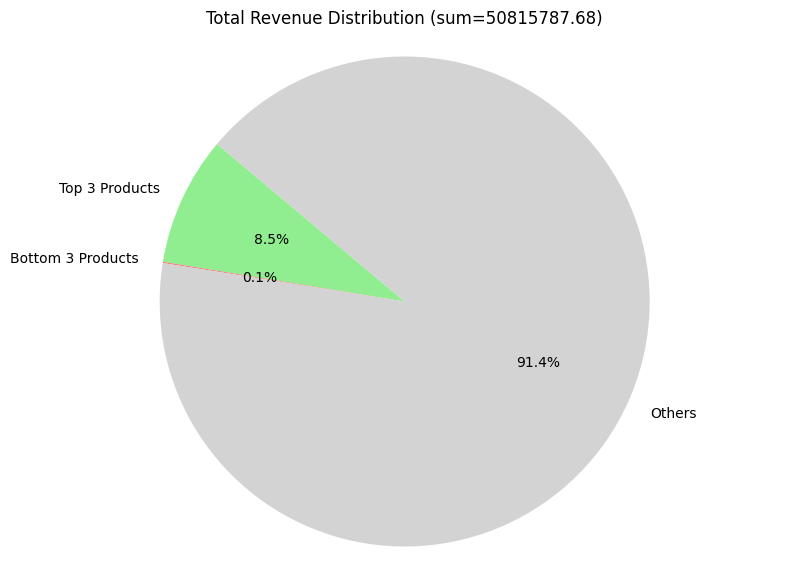

In [36]:
# Calculate top 3 and bottom 3 products based on revenue
top_products = product_revenue.nlargest(3, 'revenue')
bottom_products = product_revenue.nsmallest(3, 'revenue')

# Calculate total revenues
total_top_revenue = top_products['revenue'].sum()
total_bottom_revenue = bottom_products['revenue'].sum()
total_other_revenue = product_revenue['revenue'].sum() - total_top_revenue - total_bottom_revenue

# Prepare data for the pie chart
labels = ['Top 3 Products', 'Bottom 3 Products', 'Others']
sizes = [total_top_revenue, total_bottom_revenue, total_other_revenue]
colors = ['lightgreen', 'lightcoral', 'lightgrey']

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%')
plt.title(f'Total Revenue Distribution (sum={round(product_revenue['revenue'].sum(), 2)})')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# point 2

In [ ]:
product_2 = products.groupby(['category_1'], as_index = False)[['net_profit', 'revenue']].sum()

,category_1,net_profit,revenue
5,IT + multimédias,2414656.91,24568238.36


In [61]:
product_2.sort_values(by = 'net_profit').tail(1)

,category_1,net_profit,revenue
5,IT + multimédias,2414656.91,24568238.36


In [42]:
product_2.sort_values(by = 'revenue').tail(1)

,category_1,net_profit,revenue
5,IT + multimédias,2414656.91,24568238.36


In [43]:
best_category = product_2.sort_values(by='net_profit').tail(1)['category_1'].values[0]
print("Category with the highest net profit:")
print(best_category)

Category with the highest net profit:
IT + multimédias


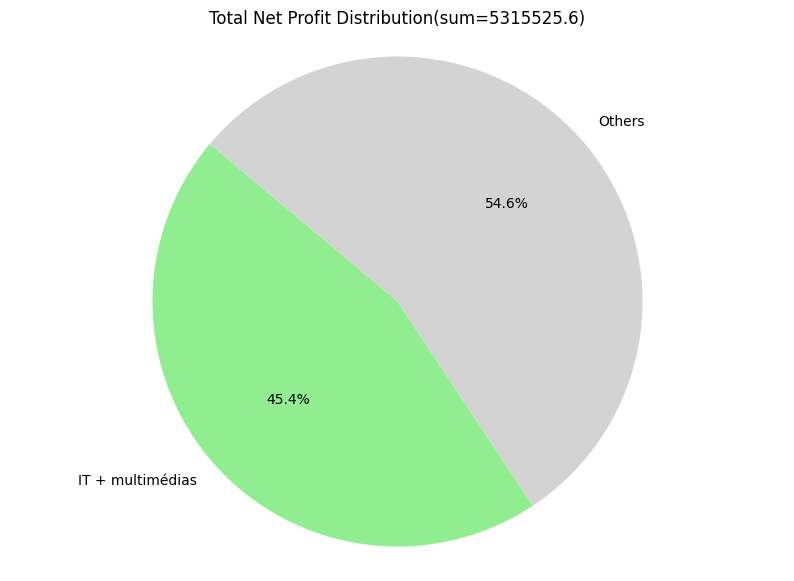

In [44]:
# Calculate top 3 and bottom 3 products based on revenue
top_products = product_2.nlargest(1, 'net_profit')

# Calculate total revenues
total_top_cat = top_products['net_profit'].sum()
total_other_cat = product_2['net_profit'].sum() - total_top_cat

# Prepare data for the pie chart
labels = [best_category, 'Others']
sizes = [total_top_cat, total_other_cat]
colors = ['lightgreen', 'lightgrey']

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%')
plt.title(f'Total Net Profit Distribution(sum={round(product_2['net_profit'].sum(), 2)})')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

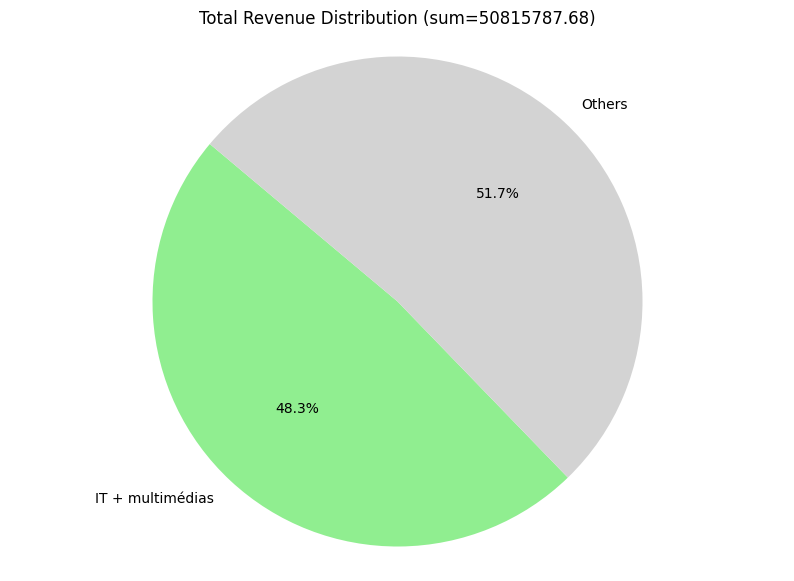

In [45]:
# Calculate top 3 and bottom 3 products based on revenue
top_products = product_2.nlargest(1, 'revenue')

# Calculate total revenues
total_top_cat = top_products['revenue'].sum()
total_other_cat = product_2['revenue'].sum() - total_top_cat

# Prepare data for the pie chart
labels = [best_category, 'Others']
sizes = [total_top_cat, total_other_cat]
colors = ['lightgreen', 'lightgrey']

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%')
plt.title(f'Total Revenue Distribution (sum={product_2['revenue'].sum()})')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# point 3

In [46]:
product_3 = products[products['category_1']== best_category]

In [47]:
product_3_revenue = product_3.groupby(['product_id', 'name'], as_index = False)['net_profit'].sum()
product_3_revenue = product_3_revenue.sort_values('net_profit')

In [48]:
product_3_revenue.head(1)

,product_id,name,net_profit
7,7,"SanDisk Extreme PRO microSDXC, 64 Gb",758.12


In [49]:
product_3_revenue.tail(1)

,product_id,name,net_profit
9,9,HP ProBook 450 G9,168718.05


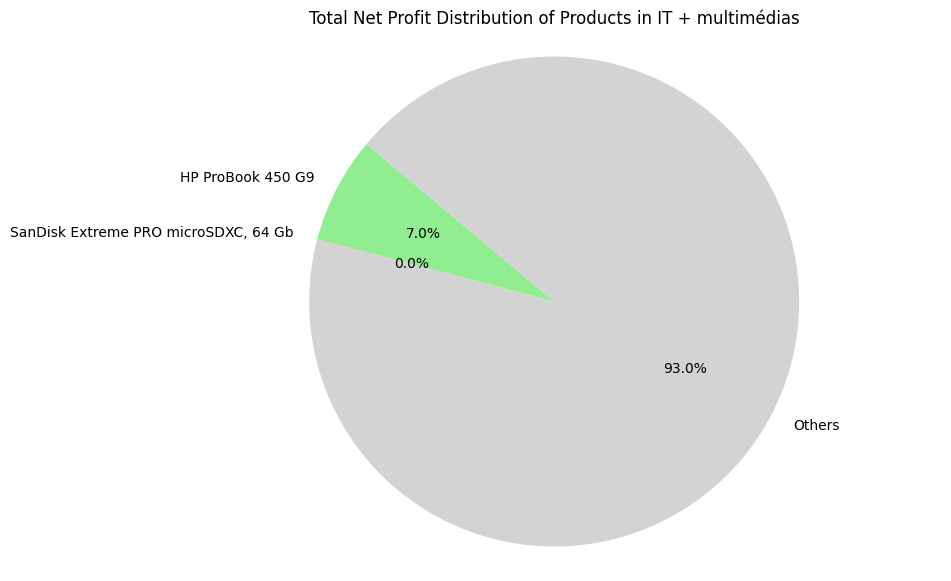

In [50]:
# Calculate top 1 and bottom 1 products based on revenue
top_products = product_3_revenue.nlargest(1, 'net_profit')
bottom_products = product_3_revenue.nsmallest(1, 'net_profit')

# Calculate total revenues
total_top_revenue = top_products['net_profit'].sum()
total_bottom_revenue = bottom_products['net_profit'].sum()
total_other_revenue = product_3_revenue['net_profit'].sum() - total_top_revenue - total_bottom_revenue

# Prepare data for the pie chart
labels = [top_products['name'].iloc[0], bottom_products['name'].iloc[0], 'Others']
sizes = [total_top_revenue, total_bottom_revenue, total_other_revenue]
colors = ['lightgreen', 'lightcoral', 'lightgrey']

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%')
plt.title(f'Total Net Profit Distribution of Products in {best_category}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# point 4

In [52]:
products = pd.merge(products, ratings, on = ['order_id', 'product_id'], how = 'left')

In [53]:
product_4 = products[products['category_1']==best_category]
product_4 = product_4[product_4['rating'].notna()]

In [ ]:
product_4_mean = product_4.groupby(['product_id', 'name'], as_index = False)['rating'].mean()
m = product_4_mean['rating'].mean()

4.06239265055149

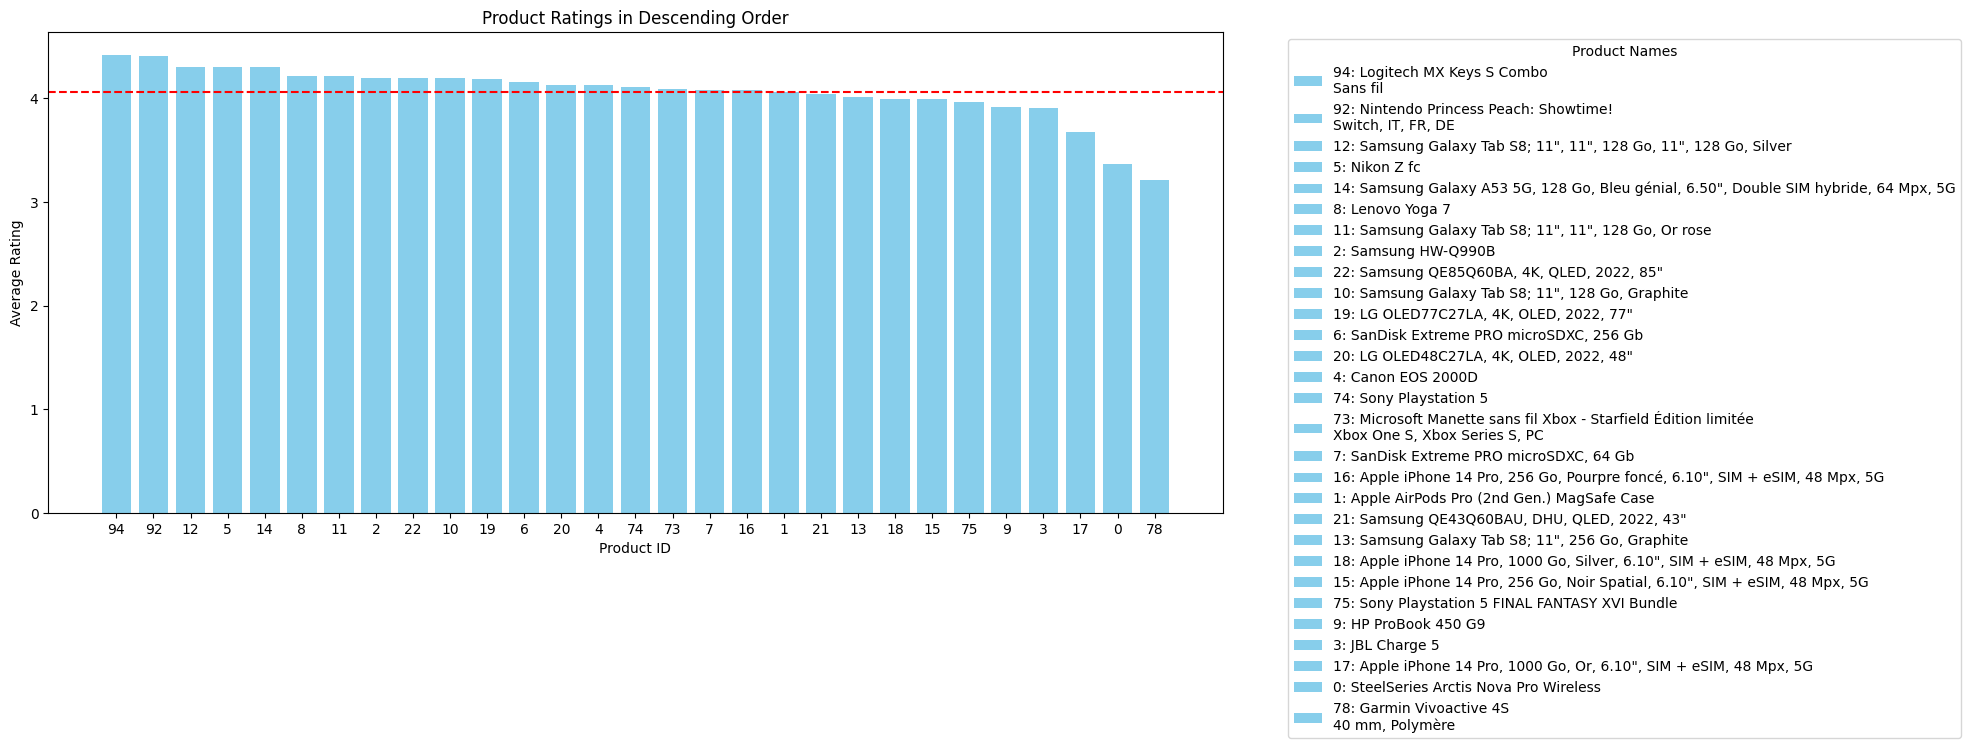

In [56]:
product_4_mean['id2name'] = product_4_mean.apply(lambda x: f"{x['product_id']}: {x['name']}" , axis=1)
product_4_mean_sorted = product_4_mean.sort_values(by='rating', ascending=False)

plt.figure(figsize=(20, 7))

bars = plt.bar(product_4_mean_sorted['product_id'].astype(str), 
               product_4_mean_sorted['rating'], color='skyblue')

plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.title('Product Ratings in Descending Order')

plt.axhline(y=m, color='red', linestyle='--', label='Average')

product_names = product_4_mean_sorted['id2name'].values
plt.legend(bars, product_names, title="Product Names", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [ ]:
product_4_mean['rating_diff_from_mean'] = product_4_mean['rating'] - m

,product_id,name,rating,id2name,rating_diff_from_mean
26,78,"Garmin Vivoactive 4S\n40 mm, Polymère",3.212714,"78: Garmin Vivoactive 4S\n40 mm, Polymère",-0.849679


In [62]:
product_4_mean.sort_values('rating_diff_from_mean').head(1)

,product_id,name,rating,id2name,rating_diff_from_mean
26,78,"Garmin Vivoactive 4S\n40 mm, Polymère",3.212714,"78: Garmin Vivoactive 4S\n40 mm, Polymère",-0.849679


In [60]:
product_4_mean.sort_values('rating_diff_from_mean').tail(1)

,product_id,name,rating,id2name,rating_diff_from_mean
28,94,Logitech MX Keys S Combo\nSans fil,4.41573,94: Logitech MX Keys S Combo\nSans fil,0.353338


# point 5

In [63]:
products_5 = products.groupby('client_id', as_index=False)['net_profit'].sum()
best_client_id = products_5.sort_values(by='net_profit').tail(1)['client_id'].iloc[0]

In [64]:
print("first and last name of the best client (by net profit):")
display(clients[clients.client_id == best_client_id][['client_id', 'first_name', 'last_name']])

first and last name of the best client (by net profit):


,client_id,first_name,last_name
19,n3-534944N,Camille,Bouvier


In [65]:
best_client_products = products[products['client_id']==best_client_id]

In [66]:
print("net profit of the best client:")
print(best_client_products['net_profit'].sum())

net profit of the best client:
3412.4089999999997


In [67]:
print("Number of orders she/he has made:", best_client_products['order_id'].nunique())
print("Number of unique product she/he has bought:", best_client_products['product_id'].nunique())

Number of orders she/he has made: 35
Number of unique product she/he has bought: 67


In [68]:
products_5_2 = products.groupby('client_id', as_index=False)['order_id'].nunique()
best_client_id_2 = products_5_2.sort_values(by='order_id').tail(1)['client_id'].iloc[0]

In [69]:
print("first and last name of the best client (by orders):")
display(clients[clients.client_id == best_client_id_2][['client_id', 'first_name', 'last_name']])

first and last name of the best client (by orders):


,client_id,first_name,last_name
9,V2-3192466U,Théo,Martin


In [70]:
best_client_products_2 = products[products['client_id']==best_client_id_2]

In [71]:
print("Net profit of the best client:", best_client_products_2['net_profit'].sum())
print("Number of orders she/he has made:", best_client_products_2['order_id'].nunique())
print("Number of unique product she/he has bought:", best_client_products_2['product_id'].nunique())

Net profit of the best client: 2335.778
Number of orders she/he has made: 45
Number of unique product she/he has bought: 64


| Best Clients                        | Number of Orders | Net Profit | Number of Orders % | Net Profit % |
|-------------------------------|------------------|------------|------------------------|------------------|
| Théo Martin (by Orders)         | **45**               | 2335.78    | 0.039%               | 0.044%         |
| Camille Bouvier (by Net Profit)     | 35               | **3412.41**    | 0.031%               | 0.064%         |

# point 6

In [ ]:
products = pd.merge(products, clients[['client_id', 'address_canton']], on='client_id', how='left')

In [ ]:
products_6 = products.groupby('address_canton', as_index=False)['net_profit'].sum()

In [ ]:
print("top 5 cantonts:")
top_cantons = products_6.sort_values(by='net_profit').tail(5)
display(top_cantons)

top 5 cantonts:


,address_canton,net_profit
7,GE,333748.332
0,AG,400888.752
22,VD,475382.172
3,BE,613060.617
25,ZH,1105821.434


In [ ]:
print('net profit fraction of top cantons:')
print(top_cantons['net_profit'].sum() / products['net_profit'].sum())

net profit fraction of top cantons:
0.551008785329706


In [ ]:
print("bottom 5 cantonts:")
bottom_cantons = products_6.sort_values(by='net_profit').head(5)
display(bottom_cantons)

bottom 5 cantonts:


,address_canton,net_profit
1,AI,12298.414
21,UR,16092.129
8,GL,22110.640
14,OW,28155.504
10,JU,30908.499


In [ ]:
print('net profit fraction of top cantons:')
print(bottom_cantons['net_profit'].sum() / products['net_profit'].sum())

net profit fraction of top cantons:
0.02061229578067285


In [ ]:
# TODO: plot

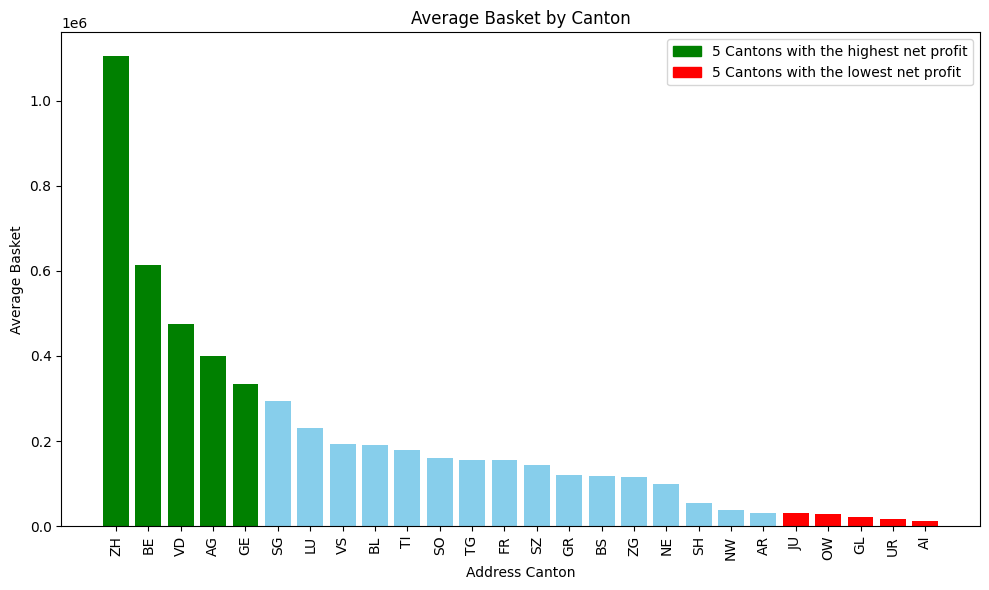

In [ ]:
import matplotlib.patches as mpatches

products_6_sorted = products_6.sort_values('net_profit', ascending=False)
colors = ['red' if canton in bottom_cantons['address_canton'].unique() else 'green' if canton in top_cantons['address_canton'].unique() else 'skyblue' for canton in products_6_sorted['address_canton']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(products_6_sorted['address_canton'], products_6_sorted['net_profit'], color=colors)

red_patch = mpatches.Patch(color='red', label='5 Cantons with the lowest net profit')
green_patch = mpatches.Patch(color='green', label='5 Cantons with the highest net profit')
plt.legend(handles=[green_patch, red_patch], loc='upper right')

# Add labels and title
plt.xlabel('Address Canton')
plt.ylabel('Average Basket')
plt.title('Average Basket by Canton')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# point 7

In [ ]:
best_canton = products_6.sort_values(by='net_profit').tail(1)['address_canton'].iloc[0]
print("canton with the highest net profit:", best_canton)

canton with the highest net profit: ZH


In [ ]:
average_basket = products.groupby('address_canton', as_index=False).agg(
    sales_sum=('sales', 'sum'),
    unique_orders=('order_id', 'nunique')
)

average_basket['average_basket'] = average_basket['sales_sum'] / average_basket['unique_orders']

In [ ]:
best_canton_ab = average_basket[average_basket['address_canton']==best_canton]['average_basket'].iloc[0]

In [ ]:
print('Cantons with higher average basket that the one with the highest net profit:')
display(average_basket[average_basket['average_basket'] > best_canton_ab])

Cantons with higher average basket that the one with the highest net profit:


,address_canton,sales_sum,unique_orders,average_basket
13,NW,409978.32,656,624.966951
14,OW,322934.10,531,608.162147
18,SZ,1557743.86,2281,682.921464
24,ZG,1244829.37,1763,706.085859


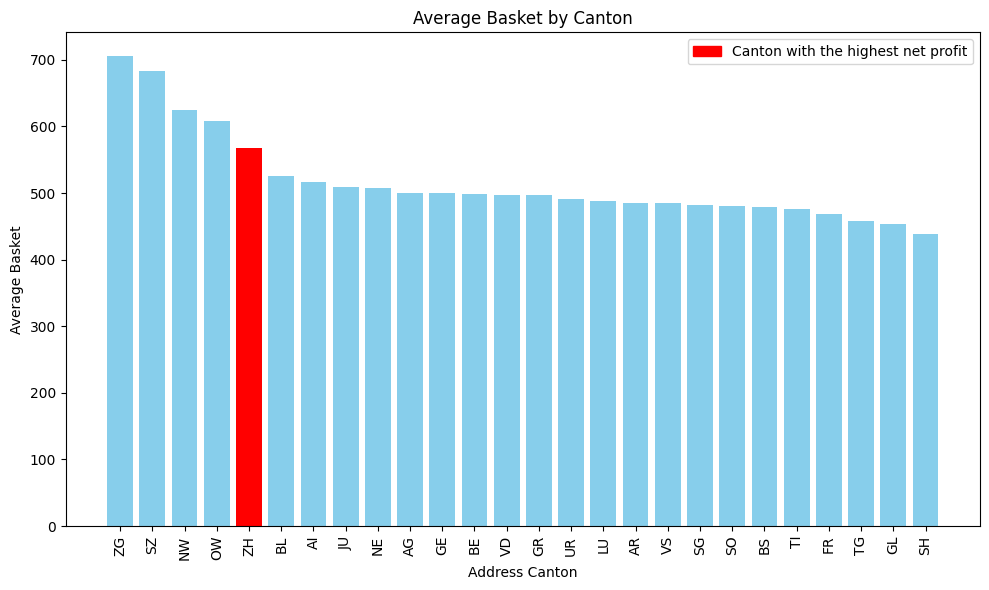

In [ ]:
import matplotlib.patches as mpatches

average_basket_sorted = average_basket.sort_values('average_basket', ascending=False)
colors = ['red' if canton == best_canton else 'skyblue' for canton in average_basket_sorted['address_canton']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(average_basket_sorted['address_canton'], average_basket_sorted['average_basket'], color=colors)

red_patch = mpatches.Patch(color='red', label='Canton with the highest net profit')
plt.legend(handles=[red_patch], loc='upper right')

# Add labels and title
plt.xlabel('Address Canton')
plt.ylabel('Average Basket')
plt.title('Average Basket by Canton')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()